In [1]:
import pandas as pd
import pickle
from keras.preprocessing.text import Tokenizer
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from swa import Transcript

Using TensorFlow backend.


# Transform raw data

In [2]:
trans=Transcript('../data/raw_data/merged.csv')

# Extract text and act_tag from raw data

In [50]:
data=[]
for i in xrange(len(trans.utterances)):
    utt=trans.utterances[i]
    text=' '.join(utt.pos_words())
    #temp.append(utt.pos_words(wn_lemmatize=True))
    labels=utt.damsl_act_tag()
    data.append([text,labels])

# Full names of the labels

In [51]:
names={}
names['sd']='Statement-non-opinion'
names['b']='Acknowledge (Backchannel)'
names['sv']='Statement-opinion'
names['%']='Abandoned or Turn-Exit'
names['aa']='Agree/Accept'

names['ba']='Appreciation'
names['qy']='Yes-No-Question'
names['x']='Non-verbal'
names['ny']='Yes answers'
names['fc']='Conventional-closing'

names['qw']='Wh-Question'
names['nn']='No answers'
names['bk']='Response Acknowledgement'
names['h']='Hedge'
names['qy^d']='Declarative Yes-No-Question'

names['bh']='Backchannel in question form'
names['^q']='Quotation'
names['bf']='Summarize/reformulate'
names['fo_o_fw_"_by_bc']='Other'
names['na']='Affirmative non-yes answers'

names['ad']='Action-directive'
names['^2']='Collaborative Completion'
names['b^m']='Repeat-phrase'
names['qo']='Open-Question'
names['qh']='Rhetorical-Questions'

names['^h']='Hold before answer/agreement'
names['ar']='Reject'
names['ng']='Negative non-no answers'
names['br']='Signal-non-understandin'
names['no']='Other answers'

names['fp']='Conventional-opening'
names['qrr']='Or-Clause'
names['arp_nd']='Dispreferred answers'
names['t3']='3rd-party-talk'
names['oo_co_cc']='Offers, Options, Commits'

names['aap_am']='Maybe/Accept-part'
names['qrr']='Or-Clause'
names['arp_nd']='Dispreferred answers'
names['t1']='Self-talk'
names['bd']='Downplayer'

names['^g']='Tag-Question'
names['qw^d']='Declarative Wh-Question'
names['fa']='Apology'
names['ft']='Self-talk'
names['+']='Segment (multi-utterance)'###############
names['']='other'################
names['act_tag']='other'############

In [52]:
for i in xrange(len(data)):
    data[i][1]=names[data[i][1]]

In [53]:
# f=open('../data/data.pkl','wb')
# pickle.dump(data,f)
# f.close()

In [54]:
reduced_label_set=['Statement-non-opinion','Acknowledge (Backchannel)','Statement-opinion','Yes-No-Question','Non-verbal','Yes answers','Wh-Question','No answers','Hedge','Declarative Wh-Question','Apology','Self-talk']
for i in xrange(len(data)):
    if(data[i][1] not in reduced_label_set):
        data[i][1]='rest'

In [55]:
f=open('../data/reduced_data.pkl','wb')
pickle.dump(data,f)
f.close()

In [56]:
data_df=pd.DataFrame(data,columns=['data','labels'])

In [57]:
data_df['labels'][111]

'rest'

# removing the other field statements

In [58]:
data_df=data_df.drop((np.where(data_df['labels']=='other')[0]))
data_df.index=range(len(data_df))

In [59]:
data_df.to_pickle('../data/data.pkl')

In [60]:
data_df

,data,labels
0,Okay .,rest
1,"So ,",Wh-Question
2,"I guess ,",rest
3,"What kind of experience do you , do you have ,...",rest
4,"I think , uh , I wonder if that worked .",rest
5,Does it say something ?,Yes-No-Question
6,I think it usually does .,Statement-non-opinion
7,"You might try , uh ,",rest
8,"I do n't know ,",Hedge
9,"hold it down a little longer ,",rest


# reducing the label set

# Divide into train and validation

In [61]:
data=np.asarray(data_df['data'])
labels=np.asarray(data_df['labels'])
VALIDATION_SPLIT=0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [62]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

# Size of the vocabulary

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
word_index_train = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_train))
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_val)
sequences = tokenizer.texts_to_sequences(x_val)
word_index_val = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_val))

Found 18393 unique tokens.
Found 10221 unique tokens.


# Size of label set

In [64]:
labels_df=pd.DataFrame(labels)

In [65]:
print 'Total labels', len(pd.Series.value_counts(labels_df[0]))

Total labels 13


In [66]:
y_train_df=pd.DataFrame(y_train)
y_val_df=pd.DataFrame(y_val)
print 'Train labels', len(pd.Series.value_counts(y_train_df[0]))
print 'Validation labels', len(pd.Series.value_counts(y_val_df[0]))

Train labels 13
Validation labels 13


# Average length of utterance

In [67]:
sum=0
for i in range(0,len(x_train)):
    temp=x_train[i].split(' ')
    sum=sum+len(temp)
len_train=sum/len(x_train)
print len_train
sum=0
for i in range(0,len(x_val)):
    temp=x_val[i].split(' ')
    sum=sum+len(temp)
len_val=sum/len(x_val)
print len_val

8.47214319782
8.52990819922


# Represent in the form of table

In [68]:
np.set_printoptions(suppress=True)
table=np.array([[len(x_train),len(word_index_train),len(pd.Series.value_counts(y_train_df[0])),1,len_train],[len(x_val),len(word_index_val),len(pd.Series.value_counts(y_val_df[0])),1,len_val]])
table_df=pd.DataFrame(table,index=['Train','Test'],columns=['M','D','L','C','W'])
table_df

,M,D,L,C,W
Train,178215.0,18393.0,13.0,1.0,8.472143
Test,44553.0,10221.0,13.0,1.0,8.529908


In [69]:
print 'M: Number of Utterances, D: Size of Vocabulary, L: Size of label set, C: Average number of labels per utterance, M: Average length of Utterance'

M: Number of Utterances, D: Size of Vocabulary, L: Size of label set, C: Average number of labels per utterance, M: Average length of Utterance


In [70]:
count=pd.Series.value_counts(labels_df[0])
count

Statement-non-opinion        75143
rest                         66589
Acknowledge (Backchannel)    38298
Statement-opinion            26426
Yes-No-Question               4726
Non-verbal                    3630
Yes answers                   3034
Wh-Question                   1979
No answers                    1377
Hedge                         1226
Self-talk                      181
Declarative Wh-Question         80
Apology                         79
Name: 0, dtype: int64

In [71]:
index=list(count.index)

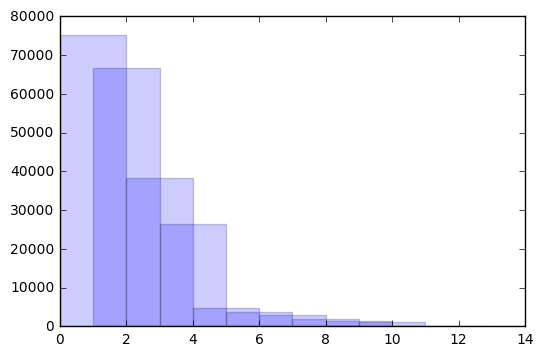

In [72]:
index=len(index)
index=np.arange(index)
means_men=list(count.values)
bar_width = 2
opacity = 0.2
rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Count')
plt.show()